In [127]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [128]:

# Specify the directory you want to use
data_dir = './data/'

# Get a list of all pickle files in the directory
pickle_files = [f for f in os.listdir(data_dir) if f.endswith('.pickle')]

# Initialize an empty list to hold dataframes
dataframes = []

for file in pickle_files:
    with open(data_dir + file, 'rb') as f:
        # Load the dataframe from the pickle file and append it to the list
        df = pickle.load(f)
        dataframes.append(df)

# Concatenate all the dataframes together
combined_df = pd.concat(dataframes)
combined_df = combined_df.sort_values(by='p')

In [129]:
combined_df.head(1)

p  air_start_pos  air_stop_pos  steps     sigmaH  sigmaH_scattered  \
0  5.863446           50.0          55.0    1.0  43.699152         48.162354   

   beam_size_increase  
0           10.213476

# Beam size comparison

Text(0.5, 1.0, 'Beam Size vs. Momentum for a proton beam\nAir start-stop pos = 50-60 m\nSteps = 0.5 m')

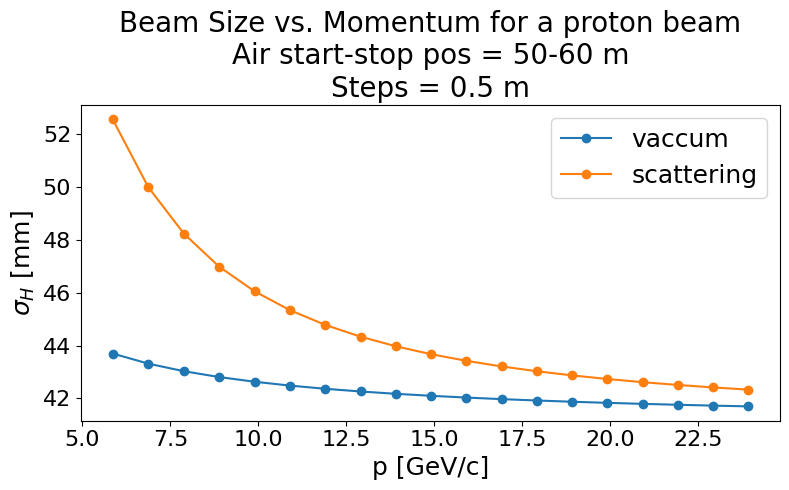

In [130]:
fig, ax = plt.subplots(figsize=(8, 5),  tight_layout=True)

air_start_pos = 50
air_stop_pos = 60

steps = min(combined_df.steps.unique())
df_steps = combined_df[(combined_df.steps == steps) & (combined_df.air_start_pos == 50) & (combined_df.air_stop_pos == 60)]

ax.plot(df_steps.p, df_steps.sigmaH, marker="o", label='vaccum')
ax.plot(df_steps.p, df_steps.sigmaH_scattered, marker="o", label='scattering')
ax.set_xlabel('p [GeV/c]')
ax.set_ylabel(r'$\sigma_H$ [mm]')
ax.legend()
ax.set_title(f'Beam Size vs. Momentum for a proton beam\nAir start-stop pos = {air_start_pos}-{air_stop_pos} m\nSteps = {steps} m')  

# Step size comparison

Text(0.5, 1.0, 'Beam Size vs. Momentum for a proton beam\nAir start pos = 50 m, air stop pos = 60 m')

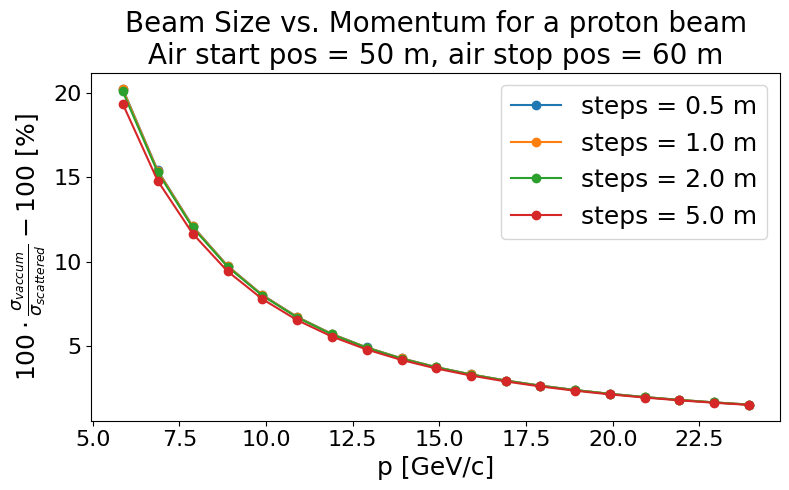

In [131]:
fig, ax = plt.subplots(figsize=(8, 5),  tight_layout=True)

air_start_pos = 50
air_stop_pos = 60

for steps in np.sort(combined_df.steps.unique()):
    df_steps = combined_df[ (combined_df.steps == steps) & (combined_df.air_start_pos == air_start_pos) & (combined_df.air_stop_pos == air_stop_pos)]
    ax.plot(df_steps.p, df_steps.beam_size_increase, marker="o", label=f'steps = {steps} m')
ax.set_xlabel('p [GeV/c]')
ax.set_ylabel(r'$100\cdot\frac{\sigma_{vaccum}}{\sigma_{scattered}}-100$ [%]')
ax.legend()
ax.set_title(f'Beam Size vs. Momentum for a proton beam\nAir start pos = {air_start_pos} m, air stop pos = {air_stop_pos} m')  

# Air thickness comparison

(0.0, 100.0)

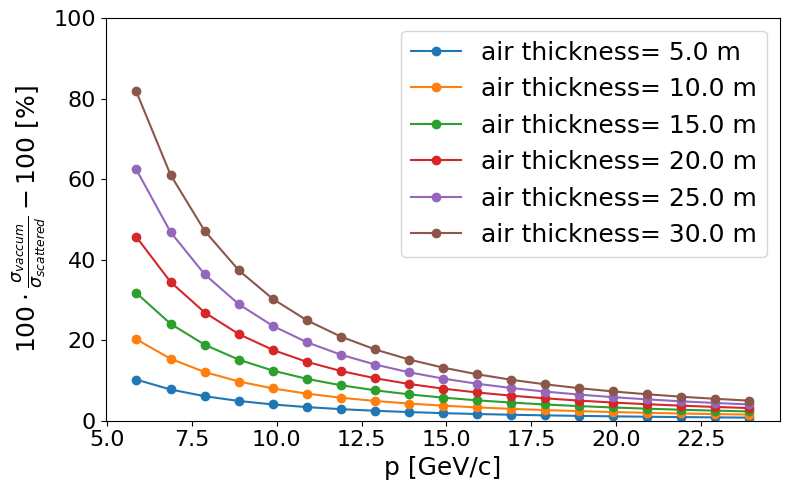

In [132]:
fig, ax = plt.subplots(figsize=(8, 5),  tight_layout=True)

steps = 1

for air_stop_pos in np.sort(combined_df.air_stop_pos.unique()):
    df_steps = combined_df[(combined_df.steps == steps) & (combined_df.air_stop_pos == air_stop_pos)]
    ax.plot(df_steps.p, df_steps.beam_size_increase, marker="o", label=f'air thickness= {(df_steps.air_stop_pos - df_steps.air_start_pos).iloc[0]} m')

ax.set_xlabel('p [GeV/c]')
ax.set_ylabel(r'$100\cdot\frac{\sigma_{vaccum}}{\sigma_{scattered}}-100$ [%]')
ax.legend()
ax.set_ylim(0, 100)